## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Import Datasets

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_excel("/content/gdrive/My Drive/Colab/anmul/data uas anmul.xlsx")
data.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                38 non-null     object 
 1   IPM                     38 non-null     float64
 2   Umur Harapan Hidup      38 non-null     float64
 3   Harapan Lama Sekolah    38 non-null     float64
 4   Rata-rata Lama Sekolah  38 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


dataset memiliki 38 baris dengan 5 variabel

In [ ]:
data.head()

,Provinsi,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah
0,ACEH,74.03,70.44,14.39,9.64
1,SUMATERA UTARA,74.02,70.28,13.49,9.93
2,SUMATERA BARAT,74.49,70.33,14.30,9.44
3,RIAU,74.79,72.52,13.42,9.43
4,JAMBI,73.43,72.04,13.14,8.90


## K-Means Clustering

In [ ]:
# check missing values
data.isna().sum()

,0
Provinsi,0
IPM,0
Umur Harapan Hidup,0
Harapan Lama Sekolah,0
Rata-rata Lama Sekolah,0


Semua variabel tidak memiliki missing values

In [ ]:
# check duplicates
data.duplicated().sum()

np.int64(0)

Tidak terdapat baris yang duplikat di dataset

In [ ]:
# drop kolom karena tidak bermakna
prov = data["Provinsi"].copy()
data = data.drop(columns=["Provinsi"])

drop variabel Provinsi karena hanya data object dan bukan nilai numerik yang menggambarkan hubungan atau jarak

In [ ]:
# minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,38.000000,38.000000,38.000000,38.000000
mean,0.639529,0.548363,0.589742,0.636170
std,0.173642,0.250842,0.168318,0.168655
min,0.000000,0.000000,0.000000,0.000000
25%,0.595415,0.390115,0.532537,0.561813
50%,0.666217,0.564779,0.596376,0.642170
75%,0.705496,0.717131,0.673394,0.728709
max,1.000000,1.000000,1.000000,1.000000


Semua variabel distandarisasi pada range 0–1 meggunakan MinMaxScaler. Ini penting agar K-Means bekerja optimal dan semua variabel memiliki kontribusi setara.

# elbow method

In [ ]:
# elbow method from k=1 to k=10
from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

menghitung SSE (Sum of Squared Error) untuk 10 jumlah cluster

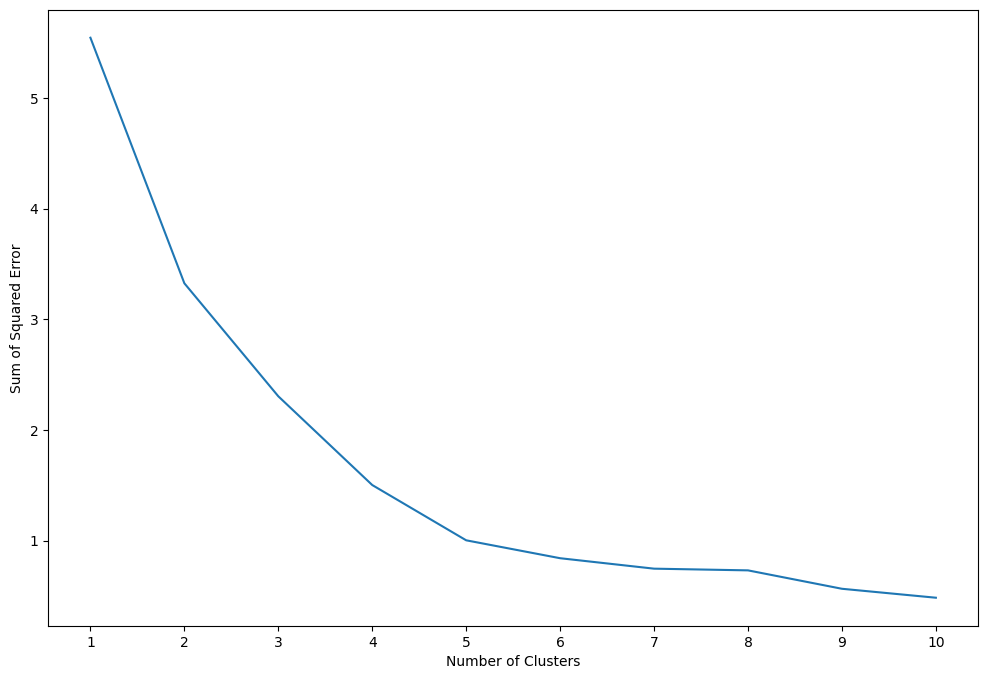

In [ ]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

Grafik diatas digunakan untuk mengidentifikasi titik tekukan (elbow), yaitu titik ketika penurunan SSE mulai tidak signifikan. Titik tersebut menunjukkan jumlah cluster yang optimal. Berdasarkan grafik, diperoleh nilai k optimal yaitu 4. Namun, nilai k = 3 dan k = 5 tetap digunakan sebagai pembanding untuk analisis lebih lanjut.

# Untuk k = 3

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data.head()

,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah,label
0,74.03,70.44,14.39,9.64,2
1,74.02,70.28,13.49,9.93,2
2,74.49,70.33,14.30,9.44,2
3,74.79,72.52,13.42,9.43,0
4,73.43,72.04,13.14,8.90,0


In [ ]:
# compute mean of each feature column by group by label
data.groupby("label").mean()

,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah
label,,,,
0,75.285556,72.698333,13.348333,9.230000
1,63.258000,66.312000,11.666000,6.944000
2,71.955333,69.293333,13.558000,9.007333


# Untuk k = 4

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data.head()

,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah,label
0,74.03,70.44,14.39,9.64,2
1,74.02,70.28,13.49,9.93,2
2,74.49,70.33,14.30,9.44,2
3,74.79,72.52,13.42,9.43,0
4,73.43,72.04,13.14,8.90,0


In [ ]:
# compute mean of each feature column by group by label
data.groupby("label").mean()

,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah
label,,,,
0,75.168125,72.894375,13.368750,9.150625
1,68.757143,67.490000,13.284286,8.137143
2,73.353846,69.923077,13.498462,9.405385
3,56.585000,65.895000,9.800000,5.165000


# Untuk k = 5

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data.head()

,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah,label
0,74.03,70.44,14.39,9.64,2
1,74.02,70.28,13.49,9.93,2
2,74.49,70.33,14.30,9.44,2
3,74.79,72.52,13.42,9.43,0
4,73.43,72.04,13.14,8.90,0


In [ ]:
# compute mean of each feature column by group by label
data.groupby("label").mean()

,IPM,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-rata Lama Sekolah
label,,,,
0,73.398667,72.085333,13.036667,8.803333
1,68.757143,67.490000,13.284286,8.137143
2,72.902222,69.486667,13.744444,9.462222
3,56.585000,65.895000,9.800000,5.165000
4,79.838000,73.730000,14.026000,10.294000


# Cluster validation

In [ ]:
def cluster_validation_all_metrics(data_scaled, k_values):
    results = []

    for k in k_values:

        # ------------------------------
        # 1. EUCLIDEAN
        # ------------------------------
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels_euclid = kmeans.fit_predict(data_scaled)
        sil_euclid = silhouette_score(data_scaled, labels_euclid, metric="euclidean")

        # ------------------------------
        # 2. MANHATTAN
        # ------------------------------
        agg_man = AgglomerativeClustering(
            n_clusters=k,
            metric="manhattan",
            linkage="average"
        )
        labels_man = agg_man.fit_predict(data_scaled)
        sil_man = silhouette_score(data_scaled, labels_man, metric="manhattan")

        # ------------------------------
        # 3. CANBERRA
        # ------------------------------
        agg_can = AgglomerativeClustering(
            n_clusters=k,
            metric="canberra",
            linkage="average"
        )
        labels_can = agg_can.fit_predict(data_scaled)
        sil_can = silhouette_score(data_scaled, labels_can, metric="canberra")

        # ------------------------------
        # Simpan hasil
        # ------------------------------
        results.append({
            "k": k,
            "Silhouette_Euclidean": sil_euclid,
            "Silhouette_Manhattan": sil_man,
            "Silhouette_Canberra": sil_can
        })

    return pd.DataFrame(results)
validation_results = cluster_validation_all_metrics(data_scaled, [3, 4, 5])
validation_results


,k,Silhouette_Euclidean,Silhouette_Manhattan,Silhouette_Canberra
0,3,0.261758,0.409475,0.725036
1,4,0.273023,0.387449,0.473105
2,5,0.333561,0.360165,0.378669


# KESIMPULAN

Berdasarkan hasil perhitungan Silhouette Score pada tiga nilai k yang diuji, yaitu k = 3, k = 4, dan k = 5, diperoleh bahwa nilai Silhouette Score tertinggi untuk metrik Euclidean berada pada k = 5, untuk metrik Manhattan tertinggi berada pada k = 3, dan untuk metrik Canberra juga tertinggi berada pada k = 3. Dengan melihat nilai Silhouette Score tersebut dapat disimpulkan bahwa k = 3 merupakan jumlah cluster yang paling optimal, karena dua dari tiga metrik jarak yang digunakan menunjukkan nilai Silhouette Score tertinggi pada k = 3.

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data["Provinsi"] = prov
data = data[["Provinsi"] + [col for col in data.columns if col != "Provinsi"]]
data.head(38)

# simpan ke CSV
data.to_csv("hasil_cluster_k3.csv", index=False, encoding="utf-8")
print("File berhasil disimpan sebagai hasil_cluster_k3.csv")

File berhasil disimpan sebagai hasil_cluster_k3.csv
